## How to remotely access NASA GES_DISC time aggregations
#### trimmed down from [example](https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20remotely%20access%20MERRA-2%20with%20Python3%20and%20calculate%20monthly%20average%20surface%20PM2.5%20for%20world%20countries)

### Procedures ###

0. set up permissions using your Earthdata credentials, in home directory: 

    - echo "machine urs.earthdata.nasa.gov login LOGIN password PASSWORD" >> ~/.netrc

    - touch ~/.urs_cookies
    
    - add these to ~/.dodsrc as explained [here](https://disc.gsfc.nasa.gov/data-access)

Import xarray

In [6]:
import xarray as xr

# Open dataset from a GDS or THREDDS aggregation

This is a lazy read: metadata only until data are needed. To get the magic string, extract an OpenDAP URL from these catalogs: 

### Time-aggregated MERRA2 collections:

3D: [THREDDS](https://goldsmr5.gesdisc.eosdis.nasa.gov/thredds/catalog.html), [GDS](https://goldsmr5.gesdisc.eosdis.nasa.gov/dods/)

2D: [THREDDS](https://goldsmr4.gesdisc.eosdis.nasa.gov/thredds/catalog.html), [GDS](https://goldsmr4.gesdisc.eosdis.nasa.gov/dods/)

### Time-aggregated GPM/IMERG rainfall:
[THREDDS](https://gpm1.gesdisc.eosdis.nasa.gov/thredds/catalog/aggregation/catalog.html), [GDS](https://gpm1.gesdisc.eosdis.nasa.gov/dods/)

#### For GDS, click `info` and copy-paste the URL from the top line. 

#### For THREDDS, keep clicking until you see 

**Access:**
1. OPENDAP: /thredds/...

Right-clicking that /thredds/... hyperlink will allow you to copy the full URL (starting from http). 

In [13]:
%%time

# URL to remotely access
# NASA THREDDS data server (TDS) URLs
URL = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/thredds/dodsC/MERRA2_MONTHLY_aggregation/M2TMNXAER.5.12.4_Aggregation.ncml'
# Read the data 
ds = xr.open_dataset(URL)
ds

CPU times: user 32.9 ms, sys: 1.44 ms, total: 34.3 ms
Wall time: 33.3 ms


<xarray.Dataset>
Dimensions:        (lon: 576, lat: 361, time: 504)
Coordinates:
  * lon            (lon) float64 -180.0 -179.4 -178.8 ... 178.1 178.8 179.4
  * lat            (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time           (time) datetime64[ns] 1980-01-01T00:30:00 ... 2021-12-01T0...
Data variables: (12/100)
    BCANGSTR       (time, lat, lon) float32 ...
    BCCMASS        (time, lat, lon) float32 ...
    BCEXTTAU       (time, lat, lon) float32 ...
    BCFLUXU        (time, lat, lon) float32 ...
    BCFLUXV        (time, lat, lon) float32 ...
    BCSCATAU       (time, lat, lon) float32 ...
    ...             ...
    Var_SUFLUXU    (time, lat, lon) float32 ...
    Var_SUFLUXV    (time, lat, lon) float32 ...
    Var_SUSCATAU   (time, lat, lon) float32 ...
    Var_TOTANGSTR  (time, lat, lon) float32 ...
    Var_TOTEXTTAU  (time, lat, lon) float32 ...
    Var_TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/30)
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Sat Dec 18 22...
    Filename:                          MERRA2_400.tavgM_2d_aer_Nx.202111.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    Source:                            CVS tag: GEOSadas-5_12_4_p30_SLES12_M2...
    Conventions:                       CF-1
    ...                                ...
    LatitudeResolution:                0.5
    LongitudeResolution:               0.625
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/FH9A0MLJPC7N
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

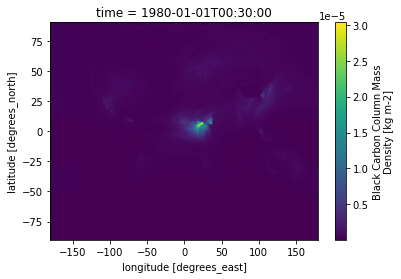

In [14]:
# Quick test plot of the first time level
ds.BCCMASS[0].plot()

# dataset in hand! 
#### Lazy read only fills a final request for calculations or plots
#### CAREFUL! Don't request the whole dataset! 

xarray resources (subsetting and slicing) are plentiful, for instance see their [how do i...](https://xarray.pydata.org/en/stable/howdoi.html) has many examples

See fuller example linked at top here for specific example